<a href="https://colab.research.google.com/github/SebastianAnaya25/paginawebasilo/blob/main/SebastianAnaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Época 1, Error total: 2
Época 11, Error total: 2
Entrenamiento completo en época 16 con error total cero.


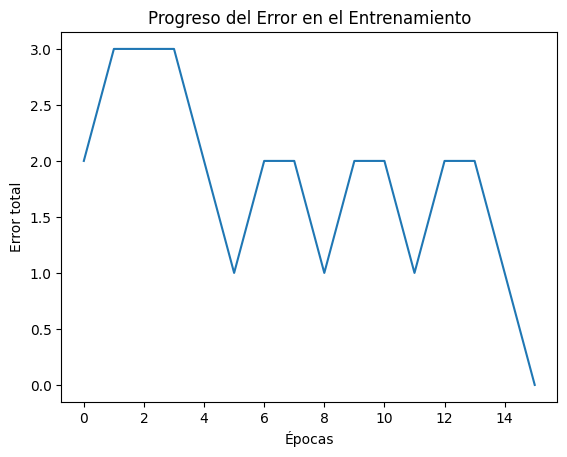


Evaluación del perceptrón:
Entrada: [0 0], Salida: 0
Entrada: [0 1], Salida: 0
Entrada: [1 0], Salida: 0
Entrada: [1 1], Salida: 1


In [3]:
# SEBASTIAN RODRIGO ANAYA RODRIGUEZ
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Inicialización de pesos y sesgo (bias) con valores aleatorios pequeños
        self.weights = np.random.uniform(-1, 1, input_size)
        self.bias = np.random.uniform(-1, 1)
        self.learning_rate = learning_rate

    def activation_function(self, x):
        # Función de activación escalón (1 si x >= 0, 0 si x < 0)
        return 1 if x >= 0 else 0

    def predict(self, X):
        # Cálculo de la salida Y en función de X (Y = f(XW + bias))
        weighted_sum = np.dot(X, self.weights) + self.bias
        return self.activation_function(weighted_sum)

    def train(self, X, D, epochs=100):
        errors = []  # Para registrar el error total en cada época
        for epoch in range(epochs):
            total_error = 0
            for x, desired_output in zip(X, D):
                # Propagación y cálculo del error
                y = self.predict(x)
                error = desired_output - y
                total_error += abs(error)

                # Ajuste de pesos y sesgo basado en el error
                self.weights += self.learning_rate * error * x
                self.bias += self.learning_rate * error

            # Registrar el error total para visualizar el progreso
            errors.append(total_error)
            if epoch % 10 == 0:
                print(f"Época {epoch+1}, Error total: {total_error}")

            # Termina si el error total es cero
            if total_error == 0:
                print(f"Entrenamiento completo en época {epoch+1} con error total cero.")
                break

        # Visualizar el progreso del error
        self._plot_error(errors)

    def _plot_error(self, errors):
        # Método privado para graficar la reducción del error total en cada época
        plt.plot(errors)
        plt.xlabel('Épocas')
        plt.ylabel('Error total')
        plt.title('Progreso del Error en el Entrenamiento')
        plt.show()

    def evaluate(self, X):
        # Método para evaluar el perceptrón con datos de prueba
        print("\nEvaluación del perceptrón:")
        for x in X:
            print(f"Entrada: {x}, Salida: {self.predict(x)}")

# Datos de ejemplo para entrenamiento (compuerta lógica AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
D = np.array([0, 0, 0, 1])  # Salidas deseadas para compuerta AND

# Creación y entrenamiento del perceptrón
perceptron = Perceptron(input_size=2, learning_rate=0.1)
perceptron.train(X, D, epochs=100)

# Evaluación del perceptrón después del entrenamiento
perceptron.evaluate(X)
